<a href="https://colab.research.google.com/github/MUHAMMADHAMZA0786/Assessment-2-Muhammad-Hamza-padhiar-21093188-/blob/main/Sales_data_Analysis_colab_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Connecting to Google drive. Already uploaded beegeez_sales_data_sqlite3.db on my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# importing libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a SQL connection to our SQLite database
con = sqlite3.connect('/content/drive/MyDrive/beegeez_sales_data_sqlite3/beegeez_sales_data_sqlite3.db')

cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print("Tables Found: ")
print(cursor.fetchall())

Tables Found: 
[('sales',)]


In [6]:
def query_data_and_basic_EDA(query, db_con):
    # query and get data
    query_for_sales_data = query
    # reading data
    sales_data = pd.read_sql(query_for_sales_data, db_con)
    #viewing top 5 rows of the data
    print("Top 5 rows of the data: ")
    print(sales_data.head())
    print()
    print()
    print()
    # data types of the columns
    print("Data types of the columns")
    print(sales_data.dtypes)
    print()
    print()
    print()
    # check the number of NaN values in each column
    print("No. of NaN values in each column: ")
    print(sales_data.isnull().sum())
    return sales_data

In [7]:
query = """
    SELECT *
    FROM sales;
    """
sales_data = query_data_and_basic_EDA(query, con)

Top 5 rows of the data: 
                              Region                Country        Item_Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales_Channel Order_Priority  Order_Date   Order_ID   Ship_Date  Units_Sold  \
0       Offline              H  2010-05-28  669165933  2010-06-27        9925   
1        Online              C  2012-08-22  963881480  2012-09-15        2804   
2       Offline              L  2014-05-02  341417157  2014-05-08        1779   
3        Online              C  2014-06-20  514321792  2014-07-05        8102   
4       Offline              L  2013-02-01  115456712  2013-02-06        5062   

   Unit

In [8]:
# Read the data successfully. No NaN/Missing values found

# **Visualization#1**

---
**Total revenue and total profit over time (Group A, Question 1)**

In [9]:
def total_profit_revenue_over_time(sales_data):
    # create temporary dataframe for visual#1
    visual_data_01 = sales_data

    # converting the date column in proper format
    visual_data_01['Ship_Date'] = pd.to_datetime(visual_data_01['Ship_Date'])

    # Sort the DataFrame by Ship_Date if needed
    visual_data_01 = visual_data_01.sort_values('Ship_Date')

    # Plotting profit and revenue over time
    plt.plot(visual_data_01['Ship_Date'], visual_data_01['Total_Profit'], label='Profit')
    plt.plot(visual_data_01['Ship_Date'], visual_data_01['Total_Revenue'], label='Revenue')

    # Set labels and title
    plt.xlabel('Shipment Date')
    plt.ylabel('Amount')
    plt.title('Profit and Revenue Over Time')

    # Display legend
    plt.legend()

    # Show the plot
    plt.show()

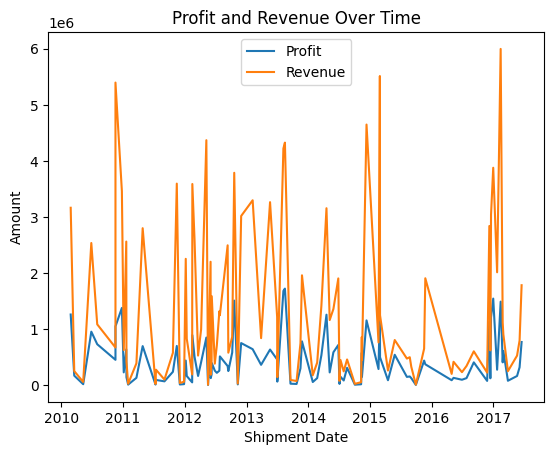

In [10]:
# calling the function
total_profit_revenue_over_time(sales_data)

# **Analysis:**


---


The analysis of the profit and revenue graph over time indicates a consistent trend where revenue consistently outperforms profit. This suggests that while the business generates revenue, the profitability remains relatively lower.

This could be attributed to factors such as high expenses, including production costs and overhead expenses, which impact the overall profit margins. Additionally, pricing strategies aimed at market penetration or maintaining competitiveness may contribute to higher revenue but lower profit margins. Fluctuations in raw material costs or external market conditions could also influence profitability.

To address this trend, the business should closely evaluate and manage expenses, optimize pricing strategies, and identify opportunities for cost reduction and operational efficiency. By doing so, the aim is to bridge the gap between revenue and profit and improve overall profitability.

In summary, the analysis highlights the need for the business to strike a balance between generating revenue and maximizing profitability by effectively managing costs, refining pricing strategies, and adapting to market dynamics.

# **Visual#02**


---

**Total revenue and profit generated by Region (Group A, Question 3)**



In [11]:
# checking unique regions
sales_data.Region.unique()

array(['Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Sub-Saharan Africa', 'Asia',
       'Middle East and North Africa', 'North America'], dtype=object)

In [12]:
def total_revenue_profit_by_region(sales_data):
    # Group the data by region and calculate the sum of profit for each region
    total_profit_by_region = sales_data.groupby('Region')['Total_Profit'].sum()

    # Sorting the profit values in descending order
    total_profit_by_region_sorted = total_profit_by_region.sort_values(ascending=False)

    # Plotting the total profit by region
    plt.bar(total_profit_by_region_sorted.index, total_profit_by_region_sorted.values)
    plt.xlabel('Region')
    plt.ylabel('Total Profit')
    plt.title('Total Profit by Region')

    # Rotate the x-axis labels if needed
    plt.xticks(rotation=90)

    # Show the plot
    plt.show()

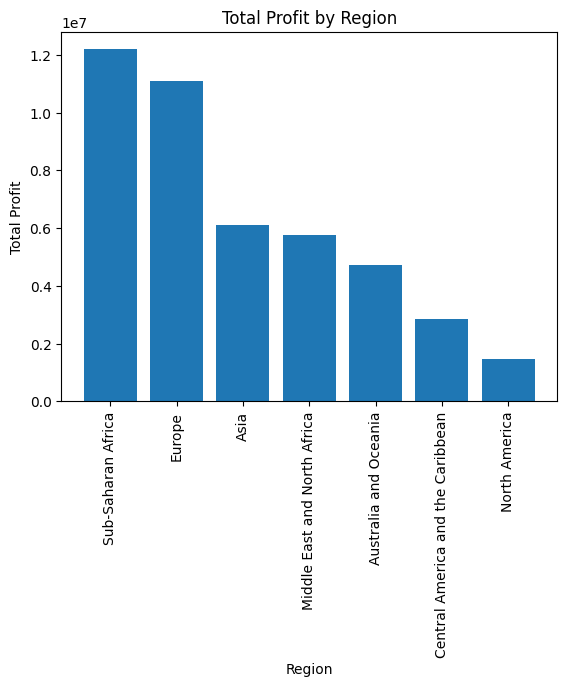

In [13]:
# calling the function
total_revenue_profit_by_region(sales_data)

# **Analysis:**

---



The analysis of the profit distribution across various regions reveals interesting findings. Sub-Saharan Africa emerges as the most lucrative region, generating a substantial profit of 12,183,211.40. This highlights the significant economic potential within the region.

Europe and Asia follow closely, exhibiting noteworthy profitability with profits amounting to 11,082,938.63 and 6,113,845.87, respectively. These figures underscore the favorable economic performance and attractive business prospects within these regions.

Australia and Oceania, along with the Middle East and North Africa, demonstrate respectable profit levels of 4,722,160.03 and 5,761,191.86, respectively. These figures indicate the viability and profitability of conducting business in these regions.

In contrast, Central America and the Caribbean, as well as North America, present comparatively lower profits of 2,846,907.85 and 1,457,942.76, respectively. While these figures are lower in magnitude, they still highlight potential business opportunities within these regions.

Overall, this analysis emphasizes the significant variations in profitability across different regions, with market dynamics, economic conditions, and regional factors playing crucial roles. These insights enable businesses to make informed decisions regarding resource allocation, market expansion strategies, and identifying areas for potential growth and investment.

# **Visual#03**


---

**Total revenue and profit generated by Sales Channel (Group B, Question 1)**




In [14]:
# checking unique sales channels
sales_data.Sales_Channel.unique()

array(['Offline', 'Online'], dtype=object)

In [15]:
def total_revenue_profit_by_sales_channel(sales_data):
    # Group the data by Sales Channel and calculate the sum of revenue and profit for each channel
    total_revenue_profit_by_sales_channel = sales_data.groupby('Sales_Channel').agg({'Total_Revenue': 'sum', 'Total_Profit': 'sum'})

    # Get the unique Sales Channels
    sales_channels = total_revenue_profit_by_sales_channel.index

    # Set the width of each bar
    bar_width = 0.35

    # Generate positions for the bars
    positions = np.arange(len(sales_channels))

    # Plotting the total revenue and profit by Sales Channel
    plt.bar(positions, total_revenue_profit_by_sales_channel['Total_Revenue'], width=bar_width, label='Total Revenue')
    plt.bar(positions + bar_width, total_revenue_profit_by_sales_channel['Total_Profit'], width=bar_width, label='Total Profit')

    # Set the x-axis ticks and labels
    plt.xticks(positions + bar_width / 2, sales_channels)

    plt.xlabel('Sales Channel')
    plt.ylabel('Amount')
    plt.title('Total Revenue and Profit by Sales Channel')
    plt.legend()

    # Show the plot
    plt.show()


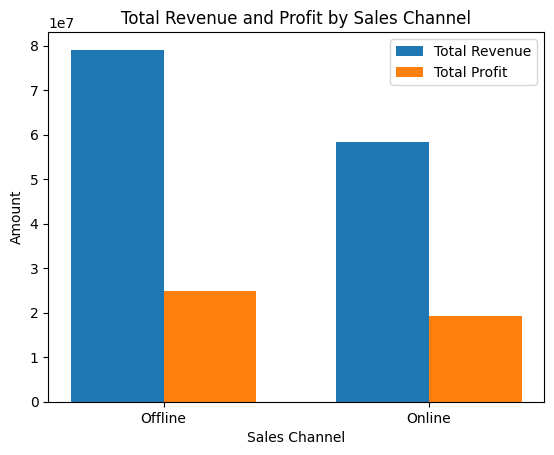

In [16]:
# calling the function
total_revenue_profit_by_sales_channel(sales_data)

# **Analysis:**

---



The Profit and Revenue Analysis by Sales Channel graph provides clear evidence indicating that the total revenue and profit derived from the offline sales channel surpass those of the online sales channel. This observation highlights the substantial superiority of the offline channel in terms of revenue generation and profit accrual.

The perceptible distinction in the lengths and heights of the bars in the graph unequivocally showcases the pronounced advantage possessed by the offline sales channel. The significantly larger dimensions of the bar depicting offline revenue and profit, in comparison to its counterpart representing online revenue and profit, underscore the considerable disparity between the two channels.

Based on the insights gleaned from this graph, it is prudent to place greater emphasis on the offline sales channel. Allocating additional resources and intensifying efforts towards fortifying the offline channel emerges as a strategic course of action to optimize revenue and profit outcomes for the business.

# **Conclusion**


---

In conclusion, the analyses conducted shed light on important aspects of the business's performance. 

Firstly, the consistent trend of revenue surpassing profit over time underscores the need for the business to address cost structures, pricing strategies, and operational efficiencies to improve profitability. By managing expenses, optimizing pricing, and closely monitoring market conditions, the business can bridge the gap between revenue and profit, ultimately enhancing its financial performance.

Secondly, the examination of profit by region highlights the varying levels of profitability across different regions. It underscores the economic potential of Sub-Saharan Africa, Europe, and Asia, while also revealing opportunities in Australia and Oceania, as well as the Middle East and North Africa. The analysis further emphasizes the importance of considering regional dynamics when making strategic decisions and investments.

And finally, the observation that offline revenue and profit surpass online counterparts emphasizes the significance of the offline sales channel and suggests the potential for higher financial gains by focusing efforts on its development.

Taking these analyses together, it is clear that the business should adopt a comprehensive approach. This includes leveraging the offline sales channel's potential, capitalizing on profitable regions, and focusing on improving profitability by closely managing costs and optimizing pricing strategies. By doing so, the business can enhance its overall performance, maximize revenue, and drive sustainable profitability.